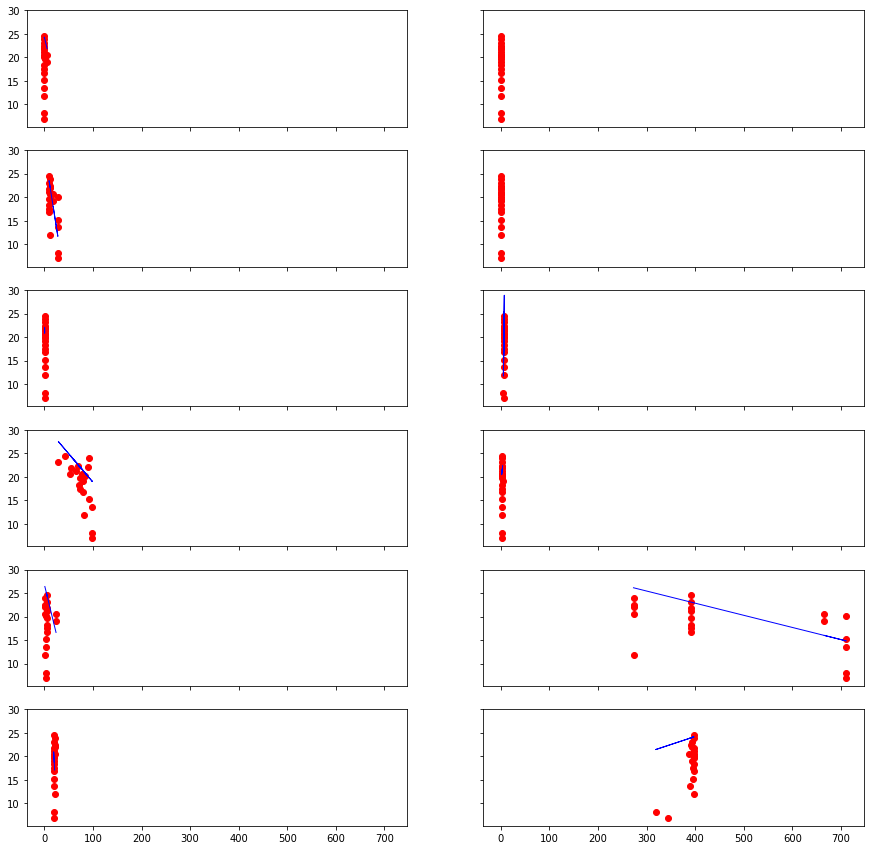

In [46]:
## Wizualizacja dla zbioru ‘boston’

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm

#załadowanie zbioru danych
boston = datasets.load_boston()
f, axarr = plt.subplots(6,2, sharex=True, sharey=True,figsize=(15,15))
for i in range(0,6):
    for j in range(0,2):
        boston_X = boston.data[:, np.newaxis, i*2+j]
        #podzielenie danych na zbiory testowe/treningowe
        boston_dataset_X_train = boston_X[:-20]
        boston_dataset_X_test = boston_X[-20:]
        #podzielenie wyników na zbiory testowe/treningowe
        boston_dataset_y_train = boston.target[:-20]
        boston_dataset_y_test = boston.target[-20:]
        #stworzenie obiektu regresji liniowej
        regr = linm.LinearRegression()
        #nauczanie na zbiosze treningowym
        regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        #rysowanie wykresów
        axarr[i,j].scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
        axarr[i,j].plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='blue', linewidth=1)
plt.show()

In [47]:
##Porównanie regresji liniowej dla zbioru ‘diabetes’
#Załadowanie zbioru danych
diabetes = datasets.load_diabetes()
#pobranie kolumny danych
diabetes_X = diabetes.data
#pobranie kolumny wyników
diabetes_Y = diabetes.target
#podzielenie danych na zbiory testowe i treningowe
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

#deklaracja słownika typów regresji liniowej
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:
    #nauczanie na zbiosze treningowym
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    #wyliczanie kwadratu średniego błędu
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318188
  wl1=3260.7037691826517
  wl2=1274.1717569251268
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392596
  wl1=1511.08233400137
  wl2=589.1449165292607
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


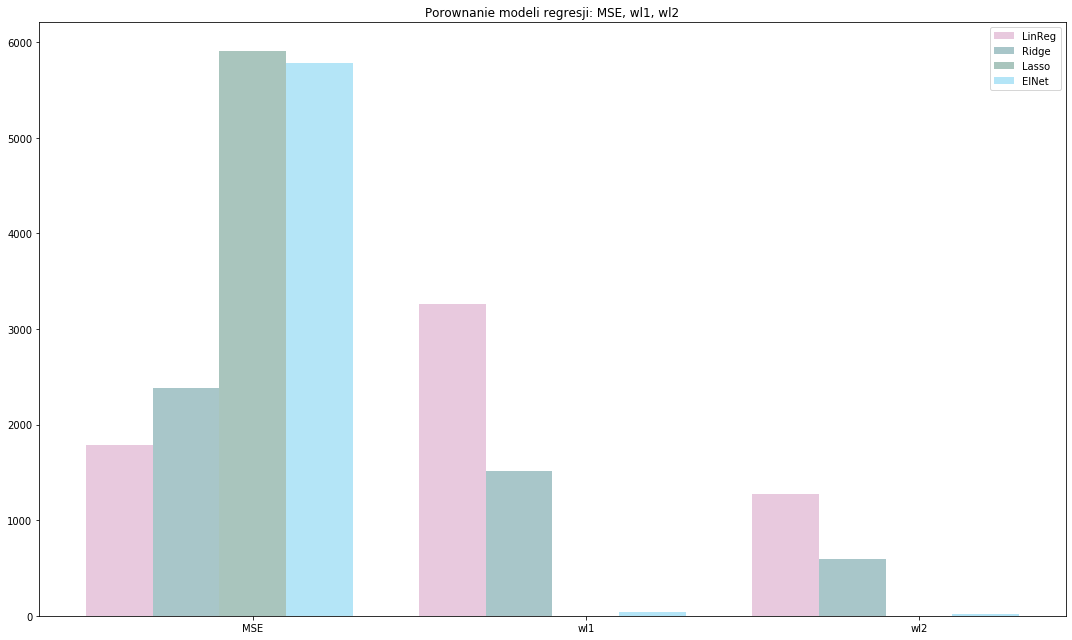

In [48]:
#wyrysowanie diagramu dokonującego porównania trzech wartości:
#MSE – mean square error, czyli błędu dopasowania,
#wl1 – wartość normy l1 wektora w,
#wl2 – wartość normy l2 wektora w

groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
#Przykład z linka nr 2
#przykład korelacji pomiędzy liczbą mieszkańców danego województwa 
#a liczbą zawartych małżeństw w 2014 roku
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split as split
#wczytanie danych z pliku csv
dane = pd.read_csv('lab5_3.csv', sep=';', encoding='iso-8859-1')
#pobranie kolumny ludnosc
ludnosc = dane.ludnosc
#pobranie kolumny malzenstwa
suma_m = dane.malzenstwa

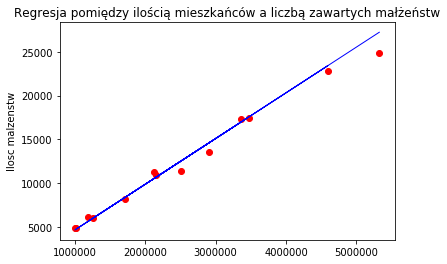

In [50]:
#podzielenie danych na zbiory testowe, treningowe
X_train, X_test, Y_train, Y_test = split(ludnosc, suma_m, test_size=0.8)
#stworzenie obiektu regresji liniowej
regr = linear_model.LinearRegression()
#nauczanie na zbiorach treningowych
regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
#rysowanie wykresu
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja pomiędzy ilością mieszkańców a liczbą zawartych małżeństw')
plt.ylabel('Ilosc malzenstw')
plt.show()

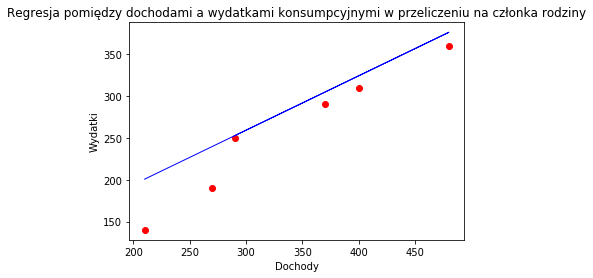

In [51]:
#Przykład z linka nr 4
#wczytanie danych
dane2 = pd.read_csv('dochody.csv', sep=',', encoding='iso-8859-1')
#wczytanie kolumn
dochody = dane2.Dochody
wydatki = dane2.Wydatki
X_train, X_test, Y_train, Y_test = train_test_split(dochody, wydatki, test_size=0.6)
#stworzenie obiektu regresji liniowej
regr = linear_model.LinearRegression()
#nauczanie na zbiorach treningowych
regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
#rysowanie wykresu
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja pomiędzy dochodami a wydatkami konsumpcyjnymi w przeliczeniu na członka rodziny')
plt.ylabel('Wydatki')
plt.xlabel('Dochody')

plt.show()

In [34]:
#Prosta regresji na podstawie wygenerowanych punktów
punkty = np.random.uniform(0,1, size=(2, 100))

In [37]:
#Średnie x, y
x_sr = punkty[0,:].mean()
y_sr = punkty[1,:].mean()
#wyliczenie błędu
x_ = np.array([x - x_sr for x in punkty[0,:]])
y_ = np.array([y - y_sr for y in punkty[1,:]])
#kwadrat błędu
x_kwadrat = np.square(x_)
y_kwadrat = np.square(y_)

In [38]:
#iloczyn błędów
iloczyn_x_y = x_kwadrat * y_kwadrat

In [39]:
wynik = pd.DataFrame(data = {'x' : punkty[0,:], 
                             'y' : punkty[1, :], 
                             'x-x_': x_, 
                             'y-y_': y_, 
                             '(x-x_sr)^2': x_kwadrat,
                             '(y-y_sr)^2': y_kwadrat,
                             '(x-x_sr) * (y-y_sr)' : iloczyn_x_y})

In [41]:
wynik

,x,y,x-x_,y-y_sr,(x-x_sr)^2,(y-y_sr)^2,(x-x_sr) * (y-y_sr)
0,0.149098,0.894548,-0.369540,0.416255,0.136560,0.173268,0.023662
1,0.608531,0.223443,0.089893,-0.254851,0.008081,0.064949,0.000525
2,0.816678,0.064820,0.298040,-0.413473,0.088828,0.170960,0.015186
3,0.021576,0.558357,-0.497062,0.080064,0.247071,0.006410,0.001584
4,0.944601,0.603353,0.425963,0.125060,0.181444,0.015640,0.002838
...,...,...,...,...,...,...,...
95,0.350101,0.242969,-0.168538,-0.235324,0.028405,0.055377,0.001573
96,0.302040,0.882716,-0.216599,0.404423,0.046915,0.163558,0.007673
97,0.063576,0.227280,-0.455062,-0.251013,0.207081,0.063008,0.013048
98,0.631869,0.344133,0.113230,-0.134161,0.012821,0.017999,0.000231


In [42]:
#wyliczenie parametrów a,b 
a = wynik['(x-x_sr) * (y-y_sr)'].sum() / wynik['(x-x_sr)^2'].sum()
b = y_sr - a * x_sr

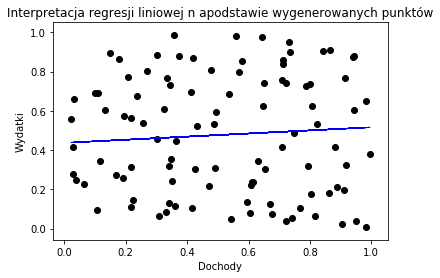

In [52]:
#narysowanie wykresu
plt.scatter(punkty[0,:], punkty[1,:],  color='black')
plt.plot(punkty[0,:], a * punkty[0,:] + b, color='blue', linewidth=1)
plt.ylabel('Wydatki')
plt.xlabel('Dochody')
plt.title('Interpretacja regresji liniowej n apodstawie wygenerowanych punktów')
plt.show()